In [1]:
from fastbook import *
setup_book()

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [2]:
to = load_pickle('..\\prepared_data\\to.pkl')

In [3]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

<font size = 6> Decision Trees </font>

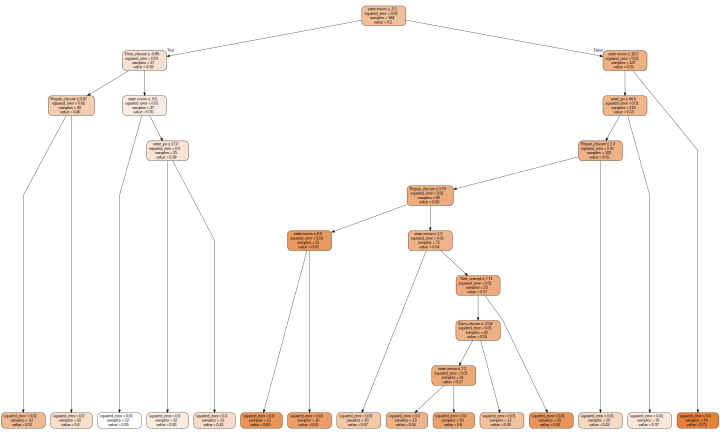

In [4]:
dtree0 = DecisionTreeRegressor(min_samples_leaf=10)
dtree0.fit(xs,y)
draw_tree(dtree0, xs, size=10, leaves_parallel=True, precision=2)

In [5]:
def r_mse(pred,y): # I will be using root mean square error to evaluate the perform of my model
    return round(math.sqrt(((pred-y)**2).mean()), 6)
def model_rmse(model, xs, y): 
    return r_mse(model.predict(xs), y) 

model_rmse(dtree0, xs, y)

0.084575

In [6]:
# error on validation set:
model_rmse(dtree0, valid_xs, valid_y)

0.115187

In [7]:
# test various hyperparams
dtrees = []

for num in (5*x for x in range(1, 11)):
    tree = DecisionTreeRegressor(min_samples_leaf=num) # minimum number of data points in a leaf node
    tree.fit(xs,y)
    error = (model_rmse(tree, xs, y), model_rmse(tree, valid_xs, valid_y)) # train and valid errors, respectively
    dtrees.append((tree, error))

dtrees

[(DecisionTreeRegressor(min_samples_leaf=5), (0.069633, 0.113489)),
 (DecisionTreeRegressor(min_samples_leaf=10), (0.084575, 0.098594)),
 (DecisionTreeRegressor(min_samples_leaf=15), (0.094155, 0.115911)),
 (DecisionTreeRegressor(min_samples_leaf=20), (0.106207, 0.108794)),
 (DecisionTreeRegressor(min_samples_leaf=25), (0.109014, 0.108507)),
 (DecisionTreeRegressor(min_samples_leaf=30), (0.115178, 0.110678)),
 (DecisionTreeRegressor(min_samples_leaf=35), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=40), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=45), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=50), (0.119561, 0.122005))]

The second tree, which had min_samples_leaf = 10, has the lowest validation set error. I now also test various other hyper parameters

In [8]:
for num in (5*x for x in range(1, 11)):
    tree = DecisionTreeRegressor(min_samples_split=num) # minimum number of samples at which you can split the node
    tree.fit(xs,y)
    error = (model_rmse(tree, xs, y), model_rmse(tree, valid_xs, valid_y)) 
    dtrees.append((tree, error))

for num in range(1, 20):
    tree = DecisionTreeRegressor(max_depth=num) # max depth
    tree.fit(xs,y)
    error = (model_rmse(tree, xs, y), model_rmse(tree, valid_xs, valid_y)) 
    dtrees.append((tree, error))
    
for num in range(4, 80):
    tree = DecisionTreeRegressor(max_leaf_nodes=num) # max number of leaf nodes
    tree.fit(xs,y)
    error = (model_rmse(tree, xs, y), model_rmse(tree, valid_xs, valid_y)) 
    dtrees.append((tree, error))

dtrees

[(DecisionTreeRegressor(min_samples_leaf=5), (0.069633, 0.113489)),
 (DecisionTreeRegressor(min_samples_leaf=10), (0.084575, 0.098594)),
 (DecisionTreeRegressor(min_samples_leaf=15), (0.094155, 0.115911)),
 (DecisionTreeRegressor(min_samples_leaf=20), (0.106207, 0.108794)),
 (DecisionTreeRegressor(min_samples_leaf=25), (0.109014, 0.108507)),
 (DecisionTreeRegressor(min_samples_leaf=30), (0.115178, 0.110678)),
 (DecisionTreeRegressor(min_samples_leaf=35), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=40), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=45), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=50), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_split=5), (0.026998, 0.095681)),
 (DecisionTreeRegressor(min_samples_split=10), (0.055762, 0.115385)),
 (DecisionTreeRegressor(min_samples_split=15), (0.071154, 0.109353)),
 (DecisionTreeRegressor(min_samples_split=20), (0.079708, 0.109858)),
 (DecisionTreeRegressor(min_samp

In [9]:
best = min((tupl[1][1] for tupl in dtrees))
best 

0.081894

This validation set error would appear to come from the decision tree with min_samples_split=30, so we will choose it as our candidate decision tree for comparison with Random Forest and Neural Net models

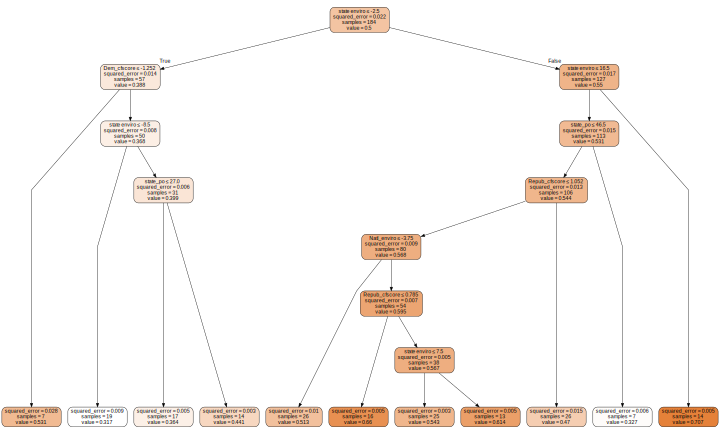

In [10]:
dtree = DecisionTreeRegressor(min_samples_split=30)
dtree.fit(xs, y)
draw_tree(dtree, xs, size=10, leaves_parallel=True, precision=3)

In [11]:
model_rmse(dtree, valid_xs, valid_y)

0.081894

Try nested hyperparameter tuning

In [12]:
for samples_leaf in (5*x for x in range(1, 11)):
    for samples_split in (5*x for x in range(1, 11)):
        for depth in range(1, 20):
            #for leaf_nodes in range(4, 80):
            tree = DecisionTreeRegressor(min_samples_leaf=samples_leaf, 
                                         min_samples_split=samples_split,
                                         max_depth=depth,
                                         #max_leaf_nodes=leaf_nodes
                                        )
            tree.fit(xs,y)
            error = (model_rmse(tree, xs, y), model_rmse(tree, valid_xs, valid_y)) 
            dtrees.append((tree, error))
                
dtrees

[(DecisionTreeRegressor(min_samples_leaf=5), (0.069633, 0.113489)),
 (DecisionTreeRegressor(min_samples_leaf=10), (0.084575, 0.098594)),
 (DecisionTreeRegressor(min_samples_leaf=15), (0.094155, 0.115911)),
 (DecisionTreeRegressor(min_samples_leaf=20), (0.106207, 0.108794)),
 (DecisionTreeRegressor(min_samples_leaf=25), (0.109014, 0.108507)),
 (DecisionTreeRegressor(min_samples_leaf=30), (0.115178, 0.110678)),
 (DecisionTreeRegressor(min_samples_leaf=35), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=40), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=45), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_leaf=50), (0.119561, 0.122005)),
 (DecisionTreeRegressor(min_samples_split=5), (0.026998, 0.095681)),
 (DecisionTreeRegressor(min_samples_split=10), (0.055762, 0.115385)),
 (DecisionTreeRegressor(min_samples_split=15), (0.071154, 0.109353)),
 (DecisionTreeRegressor(min_samples_split=20), (0.079708, 0.109858)),
 (DecisionTreeRegressor(min_samp

In [13]:
best = min((tupl[1][1] for tupl in dtrees))
best 

0.081894

So trying all the combinations of these hyperparameters didn't yield anything better than trying the hyperparameters separately

In [14]:
save_pickle('trained_models\\dtree_best.pkl',dtree)

<font size = 6> Random Forests</font>

In [15]:
def rf(xs, y, n_estimators=40, max_samples=184, # size of my training set
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, # means to use all available processors in parallel
                                 n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [16]:
rf0 = rf(xs, y, max_samples=184)

In [17]:
model_rmse(rf0, xs, y), model_rmse(rf0, valid_xs, valid_y)

(0.075565, 0.081747)

My first random forest, with no hyperparameter tuning, is comparable to the very best decision tree

The best random forest I've been able to generate so far, and which has been difficult to replicate due to the stochasticity of random forest training, is the one below.

In [18]:
# best random forest so far
best_rf = load_pickle('trained_models\\rf_best.pkl')
best_rf

RandomForestRegressor(max_features=0.7297317866938179, max_samples=184,
                      min_samples_leaf=5, n_estimators=40, n_jobs=-1,
                      oob_score=True)

In [19]:
model_rmse(best_rf, valid_xs, valid_y)

0.110463

Below are the hyperparameter tuning loops I used to find this best random forest but with which I cannot consistently replicate it.

In [20]:
# forests = {}

# for num in (5*x for x in range(1, 11)):
#     forest = rf(xs, y, min_samples_leaf=num) # minimum number of samples at which you can split the node
#     error = model_rmse(forest, valid_xs, valid_y)
#     forests[error] = forest

# from random import uniform
# for num in (uniform(0,1) for i in range(21)):
#     forest = rf(xs, y, max_features=num) # minimum number of samples at which you can split the node
#     error = model_rmse(forest, valid_xs, valid_y)
#     forests[error] = forest

In [21]:
#forests

In [22]:
# best = (min(forests), forests[min(forests)])
# best

In [23]:
# for estimators in (5*x for x in range(1, 41)):
#     for samples in (5*x for x in range(1,36)):
#         forest = rf(xs, y, max_samples=samples, 
#                     n_estimators=estimators, 
#                     max_features=0.8, 
#                     min_samples_leaf=5) 
#         error = model_rmse(forest, valid_xs, valid_y)
#         forests[error] = forest
        
# forests

In [24]:
# best = (min(forests), forests[min(forests)])
# best

<font size=6> Neural Networks</font>

In [25]:
# Model with hyperparams chosen from some non-nested and thus non-exhaustive loops for tuning, not shown in this notebook,
# but that gives the best performance I've been able to achieve so far:

best_net = load_pickle('trained_models\\0.076_error_neural_net.pkl')

Even using the same hyperparams, due to the stochasticity inherent in neural network training I've been unable to get as low of an error as the model itself, so I will use best_net itself for future inference. It is placed manually in the same folder to which dtree_best and rf_best are saved using code.

What follows is the code used to train a neural net, though its performance will likely be worse than best_net.

In [26]:
df_nn = pd.read_csv('..\\prepared_data\\dataset_7-24.csv', low_memory=False)

cond = df_nn.year<=2010
import numpy as np
train_idx = np.where(cond)[0] # if condition only param passed, returns indices of dataframe where conditions true
valid_idx = np.where(~cond)[0] # why the [0] ?
splits = (list(train_idx),list(valid_idx))

In [27]:
df_nn.drop(columns=['year', 'Dem_candidate', 'Repub_candidate', 'state'],inplace=True)
cont_nn, cat_nn = cont_cat_split(df_nn, 50, dep_var='Repub%of_two-party_vote') # splits into cont or cat based on whether var has more than whatever the specified number (e.g., 50) of different values

In [28]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names='Repub%of_two-party_vote')

In [29]:
dls0 = to_nn.dataloaders(32) # batch size 32, determined from prior experimentation to perform well
xs,y = to_nn.train.xs,to_nn.train.y
valid_xs,valid_y = to_nn.valid.xs,to_nn.valid.y

In [30]:
learn = tabular_learner(dls0, config={"act_cls": nn.ReLU()}, loss_func=F.mse_loss)

SuggestedLRs(valley=0.0012022644514217973)

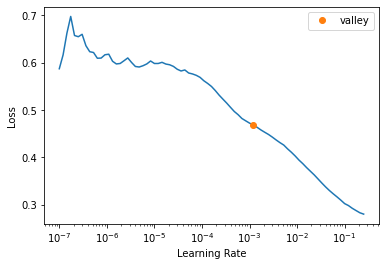

In [31]:
learn.lr_find()

In [32]:
learn.fit(200, 0.001)

epoch,train_loss,valid_loss,time
0,0.362308,0.129712,00:00
1,0.295738,0.080319,00:00
2,0.252204,0.045656,00:00
3,0.223622,0.032376,00:00
4,0.201664,0.033852,00:00
5,0.180767,0.025203,00:00
6,0.162544,0.020686,00:00
7,0.146675,0.021124,00:00
8,0.133523,0.018963,00:00
9,0.121079,0.020120,00:00


In [33]:
preds,targs = learn.get_preds()

# validation set error
r_mse(preds,targs)

0.123679

In [34]:
preds,targs = best_net.get_preds()

# validation set error
r_mse(preds,targs)

0.076316

Ideally, one would run an (at least moreso) exhaustive hyperparam tuning loop, as below. 
However, this is time intensive, and I am satisfied with the performance of best_net

In [35]:
# neural_nets = {}

# nums_of_layers = range(2,21)
# nodes_per_layer = [100*x for x in range(1,6)]
# learn_rates = (0.0001, 0.0005, 0.001, 0.005, 0.01)
# num_epochs = [10*x for x in range(1,31)]
# activ_funcs = (nn.ReLU(), nn.Sigmoid())
# batch_sizes = (1, 2, 4, 8, 16, 25, 32, 50, 75, 100, 125, 150, 184)

# for num_layers in nums_of_layers:
#     for num_nodes in nodes_per_layer:
#         for rate in learn_rates:
#             for epochs in num_epochs:
#                 for act in activ_funcs():
#                     for batch_size in batch_sizes:
#                         dls = to_nn.dataloaders(batch_size)
#                         learn = tabular_learner(dls, y_range=(0,1), layers=[num_nodes for layer in range(num_layers+1)], config={"act_cls": nn.ReLU()}, 
#                                         n_out=1, loss_func=F.mse_loss)
#                         learn.fit(epochs, rate)
#                         preds,targs = learn.get_preds()
#                         error = r_mse(preds, targs)
#                         neural_nets[error] = f'{num_layers} layers, {num_nodes} nodes, {rate} learning rate, {epochs} epochs, {act} activations'

# for i in range(10000):
#     num_layers = np.random.randint(low=2, high=21)
#     nodes_per_layer = np.random.randint(low=100, high=600)
#     learn_rates = 10**np.random.random(low=-4, high=-2)

<font size = 6 > Ensembling </font>

In [36]:
best_rf = load_pickle('trained_models\\rf_best.pkl')

In [37]:
model_rmse(best_rf, valid_xs, valid_y)

0.078015

In [38]:
rf_preds = best_rf.predict(valid_xs)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

In [39]:
r_mse(ens_preds,valid_y)

0.073931

In [40]:
ens_preds

array([0.57039493, 0.35115744, 0.46563649, 0.35061289, 0.49551894, 0.3725004 , 0.51678465, 0.49046254, 0.32031004, 0.37513092, 0.44148069, 0.44079915, 0.59190679, 0.5353872 , 0.58017938, 0.5448891 ,
       0.50807554, 0.39119375, 0.52777127, 0.39251783, 0.57140224, 0.5289039 , 0.47532975, 0.39124829, 0.60715787, 0.51170349, 0.66673642, 0.48853167, 0.42404578, 0.47937978, 0.50991822, 0.67442683])